In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualise distribution of features

In [2]:
def visualise_distribution(features, bins_dict, save = False):

    fig, axs = plt.subplots(4, 3, figsize=(15, 20))
    axs = axs.flatten()

    colors = ['red', 'blue']
    alphas = [0.5, 0.5]

    for index, feature in enumerate(features):

        low_data = df[df['2_classes'] == 'Low'][feature]
        high_data = df[df['2_classes'] == 'High'][feature]
        
        bins = bins_dict.get(feature, 10)

        # Draw the histogram
        axs[index].hist([low_data, high_data], bins=bins, density=True, histtype='step', 
                        stacked=False, color=colors, label=['Low Quality', 'High Quality'],
                        alpha=0.5)

        # Add titles and labels
        axs[index].set_title(f'Stacked Histogram for {feature}')
        axs[index].set_xlabel(feature)
        axs[index].set_ylabel('Density')
        axs[index].legend()

    for ax in axs[len(features):]:
        fig.delaxes(ax)

    # Adjust layout
    plt.tight_layout(pad=3.0)
    
    if save and 'reference' in features:
        plt.savefig(f"../Report/Image/structure_distribution", dpi=300, bbox_inches='tight', transparent=True)
    elif save and 'flesch' in features:
        plt.savefig(f"../Report/Image/readability_distribution", dpi=300, bbox_inches='tight', transparent=True)

#     if save and 'reference' in features:
#         plt.savefig(f"../Report/appendix/structure_distribution", dpi=300, bbox_inches='tight', transparent=True)
#     elif save and 'flesch' in features:
#         plt.savefig(f"../Report/appendix/readability_distribution", dpi=300, bbox_inches='tight', transparent=True)

    plt.show()

## Bin Settings for different features

In [3]:
text_structure = ['reference', 'external_link', 'internal_link', 'table', 'images', 'section', 'subsection', 'subsubsection', 'paragraph', 'sentence']

text_structure_bins = {'reference': [i for i in range(0, 600, 50)],
                       'external_link': [i for i in range(0, 600, 50)],
                       'internal_link': [i for i in range(0, 1800, 50)],
                       'table': [i for i in range(0, 20, 1)],
#                        'formula': [i for i in range(0, 20, 1)],
                       'images': [i for i in range(0, 100, 5)],
                       'section': [i for i in range(0, 30, 1)],
                       'subsection': [i for i in range(0, 50, 5)],
                       'subsubsection': [i for i in range(0, 20, 1)],
                       'paragraph': [i for i in range(0, 300, 50)],
                       'sentence': [i for i in range(0, 5000, 200)]}

readability_scores = ['flesch', 'flesch_kincaid', 'smog_index', 'coleman_liau', 'automated_readability', 'difficult_words', 'dale_chall', 'linsear', 'gunning_fog']

readability_scores_bins = {'flesch': [i for i in range(-25, 100, 5)],
                           'flesch_kincaid': [i for i in range(-5, 30, 1)],
                           'smog_index': [i for i in range(0, 25, 1)],
                           'coleman_liau': [i for i in range(0, 30, 1)],
                           'automated_readability': [i for i in range(0, 40, 1)],
                           'difficult_words': [i for i in range(0, 3000, 200)],
                           'dale_chall': list(np.arange(0, 20, 0.5)),
                           'linsear': [i for i in range(0, 60, 2)],
                           'gunning_fog': [i for i in range(0, 30, 1)]}

# Balance Data

In [4]:
df = pd.read_csv(f'../Data/grouped_dataset_(Balance).csv', keep_default_na=False)

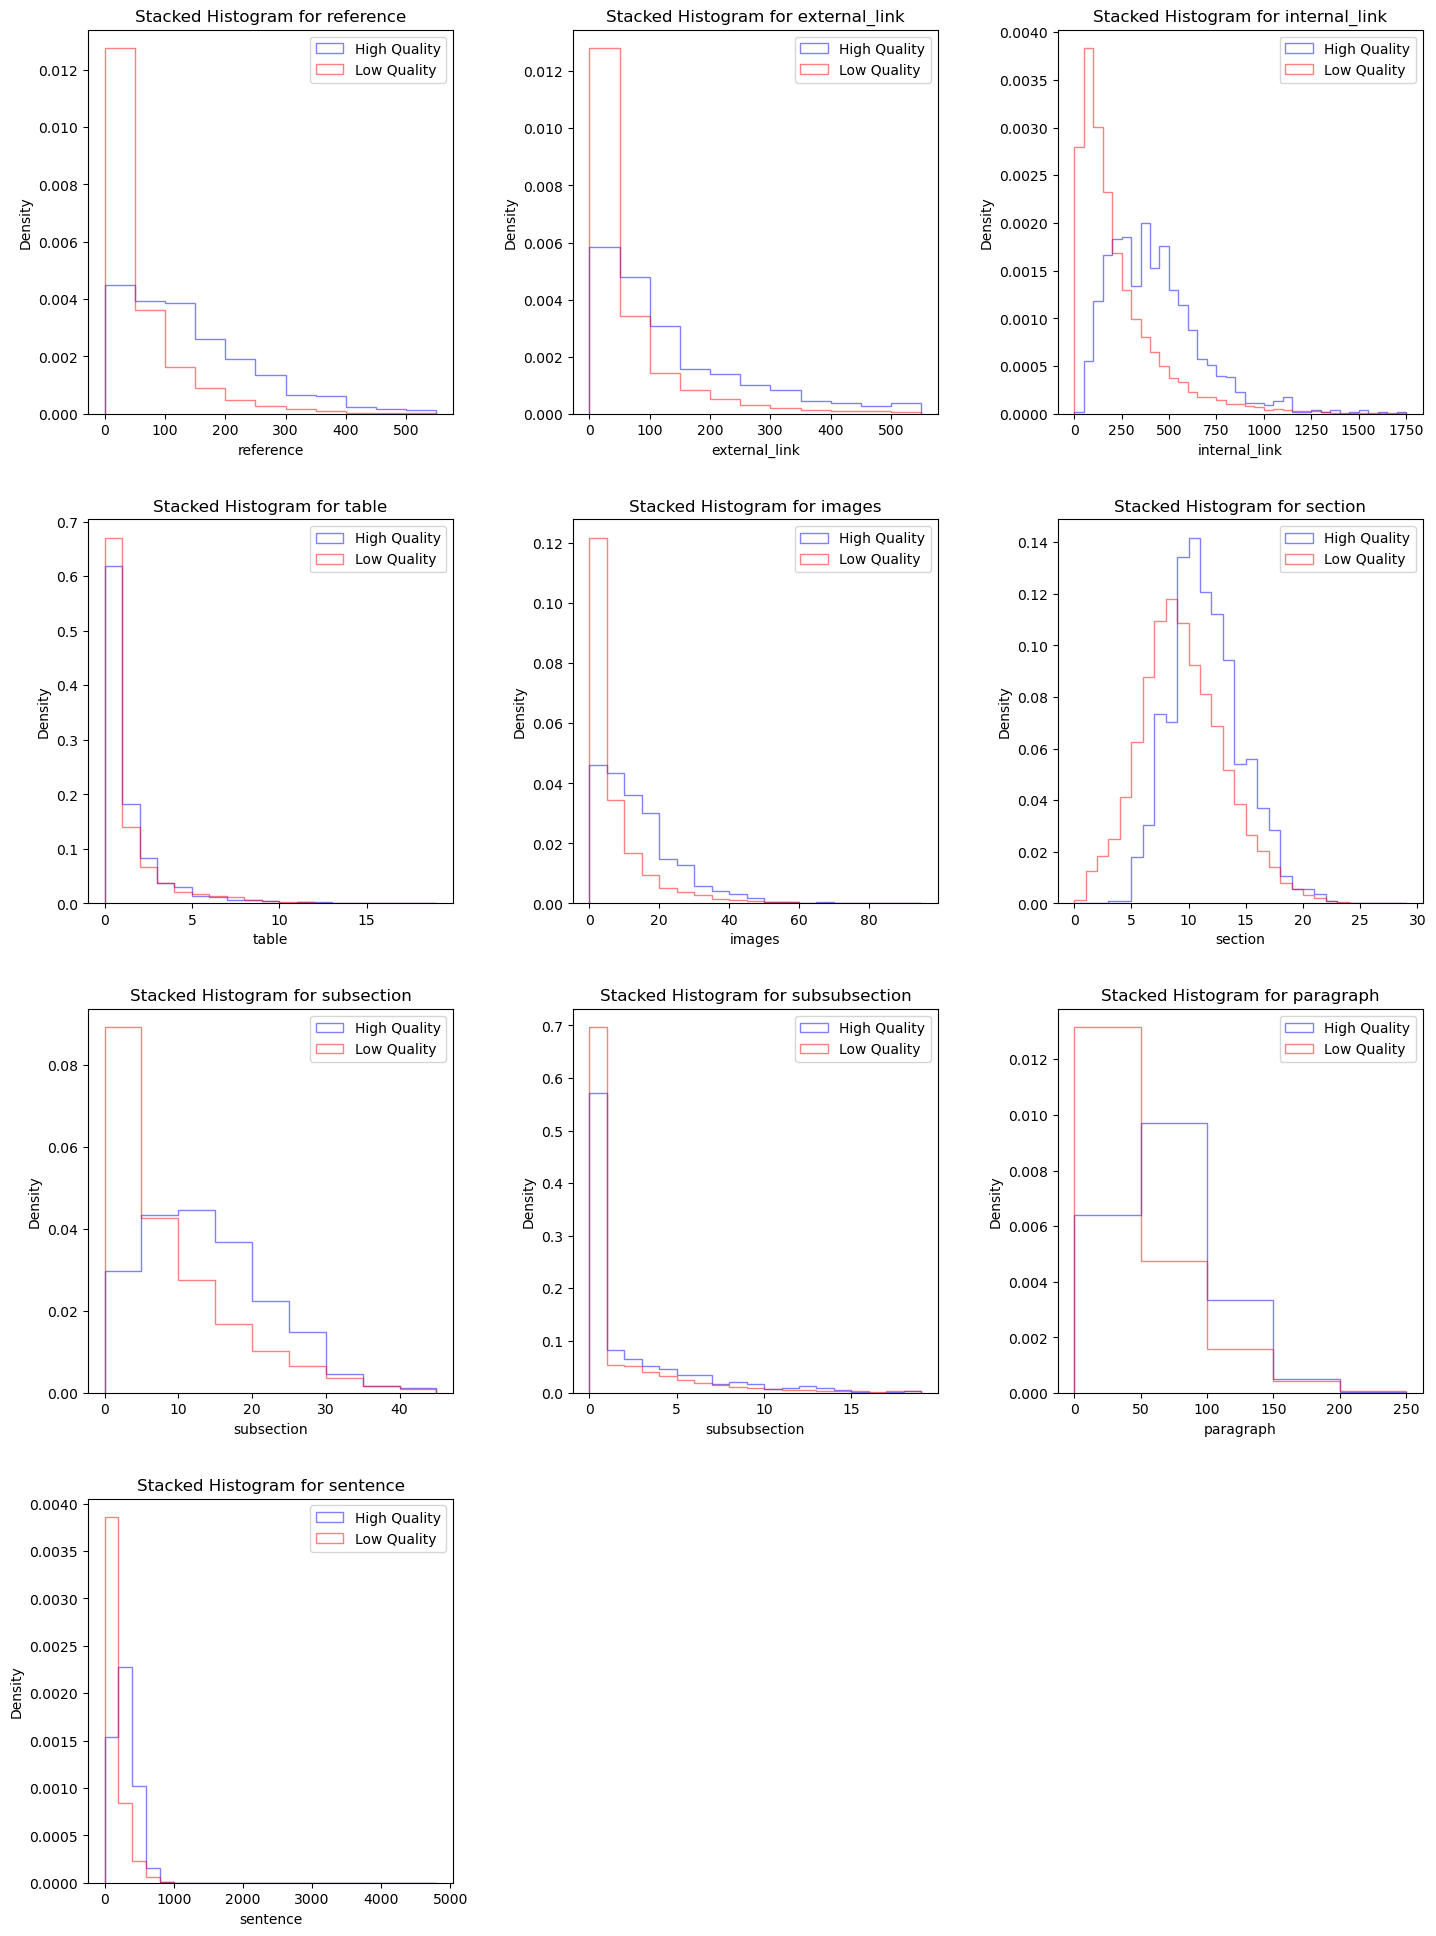

In [5]:
visualise_distribution(text_structure, text_structure_bins, save = True)

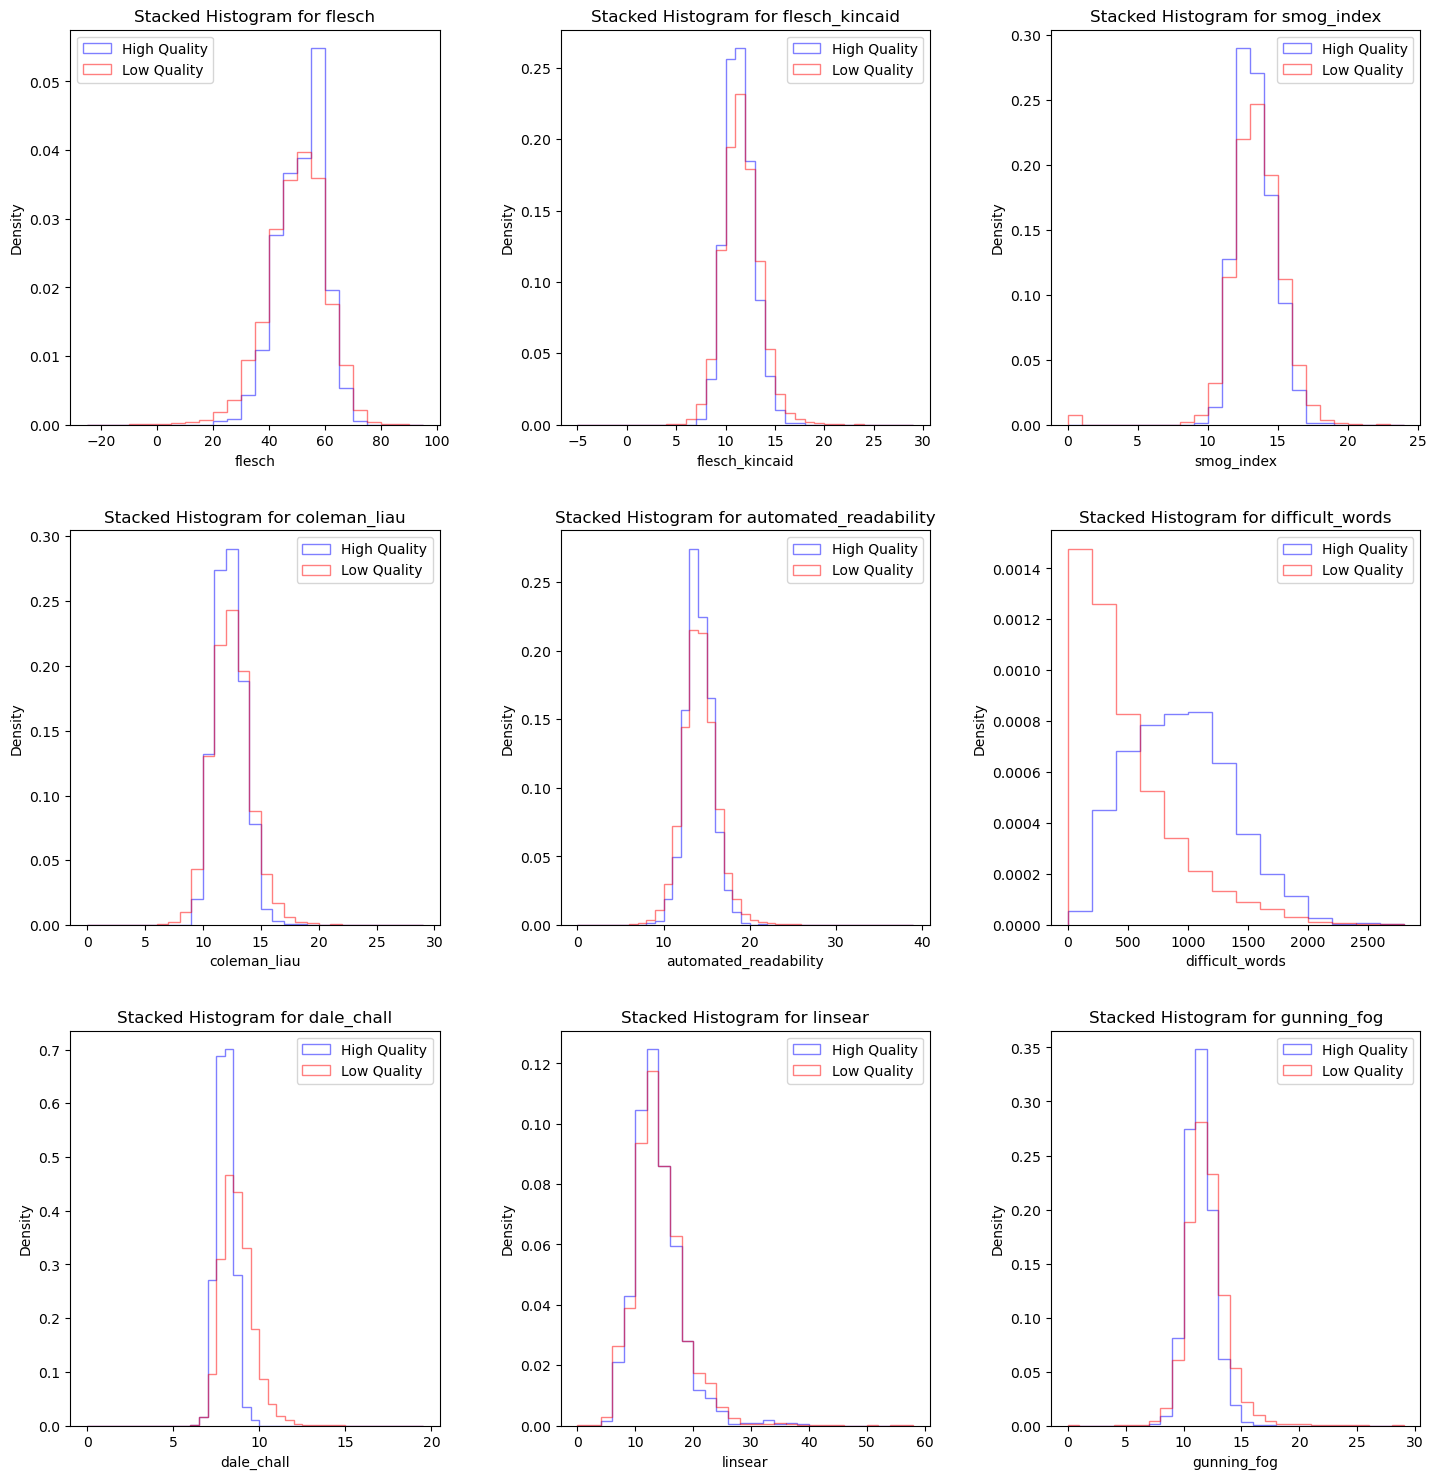

In [6]:
visualise_distribution(readability_scores, readability_scores_bins, save = True)